In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/CIS519

/content/drive/MyDrive/CIS519


In [ ]:
import pandas as pd

df = pd.read_csv('RELIANCE.NS.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,15.859429,15.944529,15.754989,15.917452,10.477991,48051995.0
1,1996-01-02,15.878770,15.956133,15.677626,15.793671,10.396506,77875009.0
2,1996-01-03,16.052837,16.783918,15.878770,15.913584,10.475446,96602936.0
3,1996-01-04,15.762726,15.813012,15.553845,15.766594,10.378686,100099436.0
4,1996-01-05,15.704703,15.704703,15.522900,15.658285,10.307390,76935930.0
...,...,...,...,...,...,...,...
6756,2022-10-31,2541.000000,2560.949951,2532.199951,2549.600098,2549.600098,5731802.0
6757,2022-11-01,2600.000000,2600.000000,2508.000000,2529.850098,2529.850098,6443999.0
6758,2022-11-02,2532.300049,2550.199951,2515.000000,2545.649902,2545.649902,4145144.0
6759,2022-11-03,2529.850098,2559.550049,2525.050049,2555.149902,2555.149902,3089026.0


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1996-01-01,15.917452
1,1996-01-02,15.793671
2,1996-01-03,15.913584
3,1996-01-04,15.766594
4,1996-01-05,15.658285
...,...,...
6756,2022-10-31,2549.600098
6757,2022-11-01,2529.850098
6758,2022-11-02,2545.649902
6759,2022-11-03,2555.149902


In [ ]:
df['Date']

0       1996-01-01
1       1996-01-02
2       1996-01-03
3       1996-01-04
4       1996-01-05
           ...    
6756    2022-10-31
6757    2022-11-01
6758    2022-11-02
6759    2022-11-03
6760    2022-11-04
Name: Date, Length: 6761, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,1996-01-01,15.917452
1,1996-01-02,15.793671
2,1996-01-03,15.913584
3,1996-01-04,15.766594
4,1996-01-05,15.658285
...,...,...
6756,2022-10-31,2549.600098
6757,2022-11-01,2529.850098
6758,2022-11-02,2545.649902
6759,2022-11-03,2555.149902


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      1996-01-01
1      1996-01-02
2      1996-01-03
3      1996-01-04
4      1996-01-05
          ...    
6756   2022-10-31
6757   2022-11-01
6758   2022-11-02
6759   2022-11-03
6760   2022-11-04
Name: Date, Length: 6761, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
1996-01-01,15.917452
1996-01-02,15.793671
1996-01-03,15.913584
1996-01-04,15.766594
1996-01-05,15.658285
...,...
2022-10-31,2549.600098
2022-11-01,2529.850098
2022-11-02,2545.649902


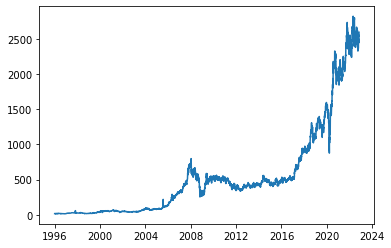

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2020-03-25', 
                                '2021-03-26', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2020-03-25,1008.391479,875.748779,934.541504,1072.087646
1,2020-03-26,875.748779,934.541504,1072.087646,1056.188354
2,2020-03-27,934.541504,1072.087646,1056.188354,1055.593994
3,2020-03-30,1072.087646,1056.188354,1055.593994,1020.774109
4,2020-03-31,1056.188354,1055.593994,1020.774109,1103.291870
...,...,...,...,...,...
247,2021-03-22,2055.350098,2009.099976,2082.000000,2062.399902
248,2021-03-23,2009.099976,2082.000000,2062.399902,2087.500000
249,2021-03-24,2082.000000,2062.399902,2087.500000,2047.300049
250,2021-03-25,2062.399902,2087.500000,2047.300049,1991.449951


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

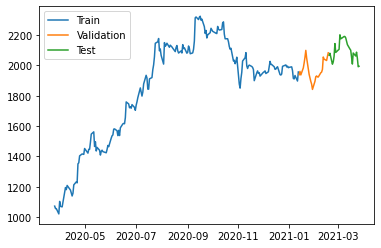

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.0005),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, batch_size=32)

Epoch 1/1000
7/7 [==============================] - 3s 95ms/step - loss: 3553555.0000 - mean_absolute_error: 1856.0114 - val_loss: 3899504.0000 - val_mean_absolute_error: 1973.5308
Epoch 2/1000
7/7 [==============================] - 0s 11ms/step - loss: 3552251.5000 - mean_absolute_error: 1855.6598 - val_loss: 3898366.0000 - val_mean_absolute_error: 1973.2426
Epoch 3/1000
7/7 [==============================] - 0s 10ms/step - loss: 3551315.5000 - mean_absolute_error: 1855.4091 - val_loss: 3897472.0000 - val_mean_absolute_error: 1973.0160
Epoch 4/1000
7/7 [==============================] - 0s 11ms/step - loss: 3550501.5000 - mean_absolute_error: 1855.1886 - val_loss: 3896595.2500 - val_mean_absolute_error: 1972.7937
Epoch 5/1000
7/7 [==============================] - 0s 8ms/step - loss: 3549674.0000 - mean_absolute_error: 1854.9655 - val_loss: 3895690.5000 - val_mean_absolute_error: 1972.5642
Epoch 6/1000
7/7 [==============================] - 0s 9ms/step - loss: 3548826.5000 - mean_abso

7/7 [==============================] - 0s 3ms/step


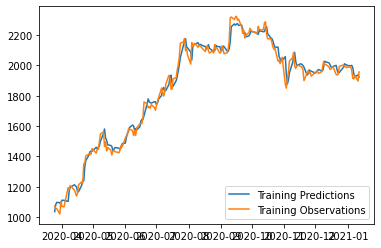

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 25ms/step


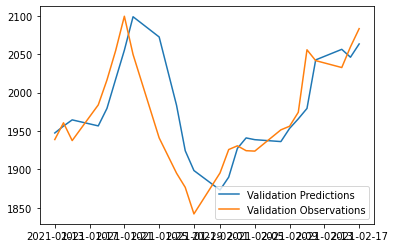

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 19ms/step


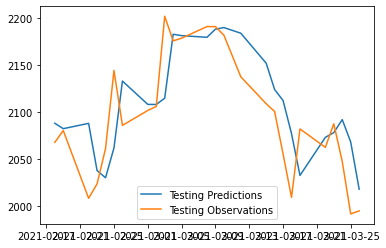

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

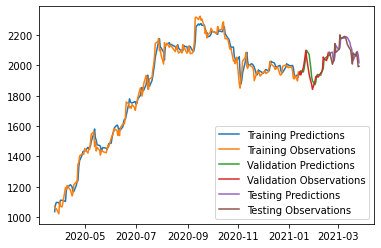

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 19ms/step


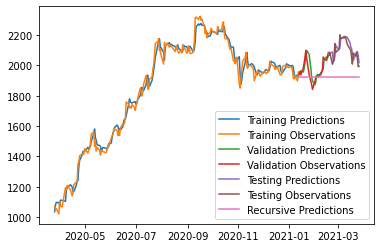

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])